In [35]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [39]:
start_date='2015-04-01'
end_date='2023-4-23'
ticker='NVDA'
def rolling_strategy(s,e,tic,ma1,ma2):
    # suppress all warnings
    warnings.filterwarnings("ignore")
    df=yf.download(ticker,start=start_date,end=end_date)
    price=df[['Adj Close']]
    MA1='MA{}'.format(str(ma1))
    MA2='MA{}'.format(str(ma2))
    price[MA1]=price['Adj Close'].rolling(window=ma1).mean()
    price[MA2]=price['Adj Close'].rolling(window=ma2).mean()
    price=price.dropna()
    price[['Adj Close',MA1,MA2]].plot()
    price['Position']=np.where(price[MA1]>price[MA2],1,-1)
    detect=price['Position'].diff()
    flip_indices=price.index[detect!=0].to_list()
    print('Position changes at ',flip_indices)
    ax = price.plot(secondary_y='Position', figsize=(10, 6))
    ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
    price['Return']=np.log(price['Adj Close']/
                           price['Adj Close'].shift(1))
    price['Strategy']=price['Return'].shift(1)*price['Position']
    price.dropna(inplace=True)
    ret=np.exp(price[['Return','Strategy']].sum())
    std=price[['Return','Strategy']].std()*252**0.5
    # reset the warnings filter
    warnings.filterwarnings("default")
    print(ret)
    print(std)

[*********************100%***********************]  1 of 1 completed
Position changes at  [Timestamp('2016-01-14 00:00:00'), Timestamp('2018-11-06 00:00:00'), Timestamp('2019-08-12 00:00:00'), Timestamp('2022-04-18 00:00:00'), Timestamp('2023-01-24 00:00:00')]
Return       40.975626
Strategy    109.764710
dtype: float64
Return      0.495978
Strategy    0.495783
dtype: float64


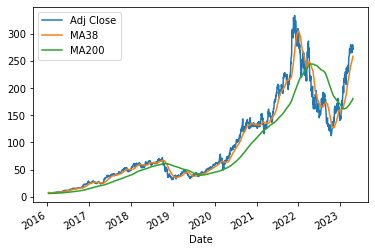

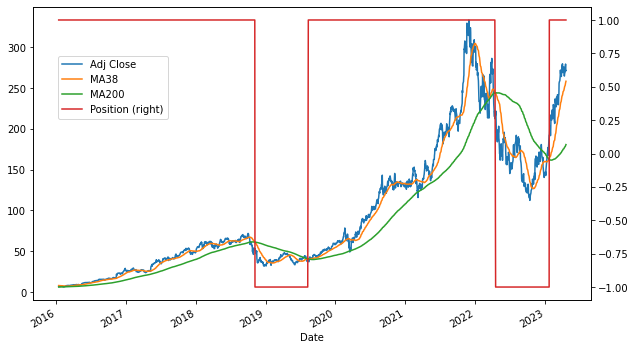

In [38]:
rolling_strategy(start_date,end_date,'NVDA',38,200)

In [47]:
def rolling_strategy_simp(s,e,tic,ma1,ma2):
    # suppress all warnings
    warnings.filterwarnings("ignore")
    df=yf.download(ticker,start=start_date,end=end_date)
    price=df[['Adj Close']]
    MA1='MA{}'.format(str(ma1))
    MA2='MA{}'.format(str(ma2))
    price[MA1]=price['Adj Close'].rolling(window=int(ma1)).mean()
    print(ma1,ma2)
    price[MA2]=price['Adj Close'].rolling(window=int(ma2)).mean()
    price=price.dropna()
    price['Position']=np.where(price[MA1]>price[MA2],1,-1)
    detect=price['Position'].diff()
    price['Return']=np.log(price['Adj Close']/
                           price['Adj Close'].shift(1))
    price['Strategy']=price['Return'].shift(1)*price['Position']
    price.dropna(inplace=True)
    ret=np.exp(price[['Strategy']].sum())
    std=price[['Strategy']].std()*252**0.5
    warnings.filterwarnings("default")
    return ret/std
#Optimization
from scipy.optimize import minimize
# define the initial guess
x0 = [38, 200]
# define the bounds for the input variables
bounds = [(20, 60), (180, 230)]
# integer constraint
def integer_constraint(x):
    # custom constraint function that checks if the input variable is an integer
    return np.round(x) - x
constraints = [{'type': 'ineq', 'fun': integer_constraint}]

# use the Nelder-Mead method to minimize the function
res = minimize(lambda x: rolling_strategy_simp(
    start_date,end_date,'NVDA',x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("Optimized values:", res.x)
print("Function value:", res.fun)


[*********************100%***********************]  1 of 1 completed
38.0 200.0
[*********************100%***********************]  1 of 1 completed
38.00000001490116 200.0
[*********************100%***********************]  1 of 1 completed
38.0 200.00000001490116
Optimized values: [ 38. 200.]
Function value: 221.39695553798853
